# Sensitivity  plotter
A simple notebook to plot some sensitivity curves from pre-defined concepts

To run this on Google Colab:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnGBaker/GWI-metrics/blob/main/Notebooks/sensitivityPlotter.ipynb)

## Sensitivity curve

The sensitivity curve is based on the LISA Sensitivity and SNR Technical Note `LISA-LCST-SGS-TN-001`, available on [arXiv](https://arxiv.org/abs/2108.01167).



### Some basic setup

In [22]:
src='../src/'
!mkdir -p '../plots/'
import numpy as np
import matplotlib.pyplot as plt
import sys
import inspect
sys.path.append(src)
import metrics
import concepts
import constants
import background as bg

### make the plots

In [23]:
# list of concepts you want to make plots of
all_missions = (
        'LISAold',
    'LISACBE',
    'LISASciRDv1',
    'LISASciRDLowLev',
    'TwinLISA',
    'LISAGrande',
    'LISAU',
    'LISAMax',
    'muAres',
    'GoBIGLISA',
    'ALIA',
    'ALIAbender',
    'ALIAcornish',
    'ALIAlowL',
    'ALIAtwin',
    'GoBIGALIA',
    'DECIGO',
    'DOcons', 
)

missions = (
    #'LISACBE',
    #'LISAold',
    'LISASciRDv1',
    #'LISASciRDLowLev',
    'LISAGrande',
    'LISAU',
    #'LISAMax',
    #'muAres',
    'TwinLISA',
    'GoBIGLISA',
    'ALIA',
    #'ALIAbender',
    #'ALIAcornish',
    #'ALIAlowL',
    'ALIAtwin',
    'GoBIGALIA',
    #'DECIGO',
    #'DOcons'
)


# Define a frequency axis
f_mu = -5, 0 
f_m = -4, 0
f_d = -3, 1

faxis = dict(zip(all_missions,(f_m,f_m, f_m, f_m,f_m, f_mu, f_mu, f_mu, f_mu, f_m, f_d, f_d, f_d, f_d, f_d, f_d, f_d)))

In [46]:
# plot settings

# define colors:

pinks = ["#fe6454","#983c32","#fe9387"]
yellows = ["#6b8432", "#b2dc53",]
blues = ["#9387d9", "#5142a0"]


colpal = dict(zip(missions, ("k", blues[1],blues[0],yellows[1],yellows[0], pinks[0], pinks[2], pinks[1])))
linepal = dict(zip(missions, ("-", "-.", (5, (10, 3)), "-", "-", "-", "-", "-" )))
markpal = dict(zip(missions, ("none", "none", "none", "none", "*", "none", "none", "*")))
widthpal = dict(zip(missions, (3, 1.5, 1.5, 1.5, 1.5, 2.5, 1.5, 1.5)))
zorderpal = dict(zip(missions, [len(missions)-i for i in range(len(m))]))



In [47]:
zorderpal

{'LISASciRDv1': 8,
 'LISAGrande': 7,
 'LISAU': 6,
 'TwinLISA': 5,
 'GoBIGLISA': 4,
 'ALIA': 3,
 'ALIAtwin': 2,
 'GoBIGALIA': 1}

### First we plot without the galactic background

In [48]:
faxis

{'LISAold': (-4, 0),
 'LISACBE': (-4, 0),
 'LISASciRDv1': (-4, 0),
 'LISASciRDLowLev': (-4, 0),
 'TwinLISA': (-4, 0),
 'LISAGrande': (-5, 0),
 'LISAU': (-5, 0),
 'LISAMax': (-5, 0),
 'muAres': (-5, 0),
 'GoBIGLISA': (-4, 0),
 'ALIA': (-3, 1),
 'ALIAbender': (-3, 1),
 'ALIAcornish': (-3, 1),
 'ALIAlowL': (-3, 1),
 'ALIAtwin': (-3, 1),
 'GoBIGALIA': (-3, 1),
 'DECIGO': (-3, 1)}

LISASciRDv1
f	S_h
0.0001	2.1134665654979576e-33
0.001	1.633751645280467e-38
0.01	1.4124744403364094e-40
0.1	2.096656544353494e-39
1.0	1.9778548603796396e-37
LISAGrande
LISAU
TwinLISA
GoBIGLISA
ALIA
ALIAtwin
GoBIGALIA


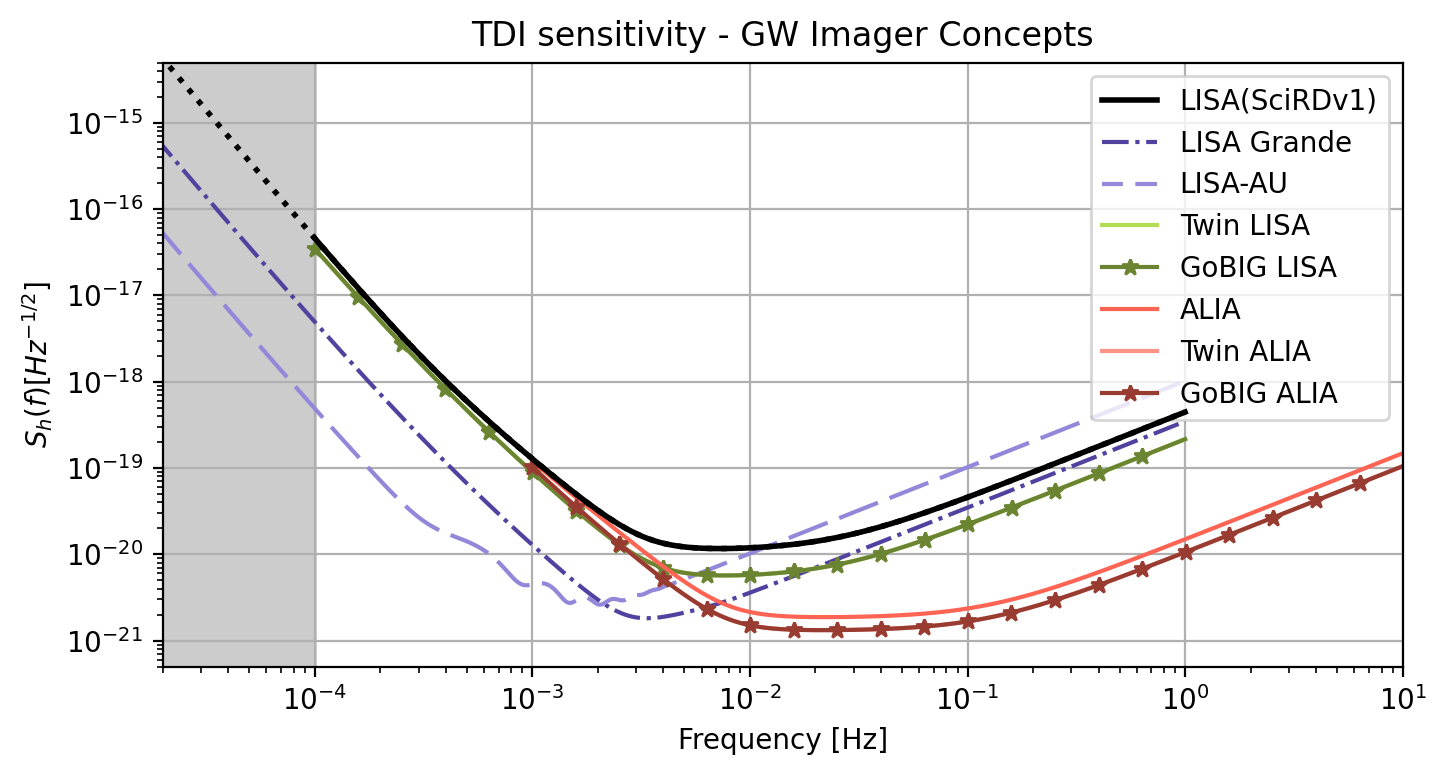

In [49]:
# f = np.logspace(-5,1,1000)

fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(1,1,1)

for m in missions:
    print(m)
    fr=np.array([0.00010, 0.00100, 0.01000, 0.10000, 1.00000])
    f = np.logspace(faxis[m][0],faxis[m][1], 1000 )
    model = eval('concepts.%s' % m)
    Sh = metrics.makeSensitivity(f, model, style = 'TN')
    Shr = metrics.makeSensitivity(fr, model, style = 'TN')
    if m == 'LISASciRDv1':
        #ax.plot(fr,np.sqrt(Shr),label=model.get('label'), color = 'r', ls='none', lw=2, zorder=len(m), marker = '.', markersize = '10')
        ax.plot(np.logspace(-5, 0, 1000 ),np.sqrt(metrics.makeSensitivity(np.logspace(-5, 0, 1000 ), model, style = 'TN')), color = 'k', ls=':', lw=2, zorder=len(m))
        ax.plot(f,np.sqrt(Sh),label=model.get('label'), color = colpal[m], ls=linepal[m], lw=2, marker = markpal[m], markevery = 10, zorder=len(m))
        print('f', 'S_h', sep='\t')
        for a, b in zip(fr,Shr):

            print(a, b, sep='\t')
    else:
        ax.plot(f,np.sqrt(Sh),label=model.get('label'), color=colpal[m],  ls=linepal[m], marker = markpal[m], markevery=50)
        
ax.fill_between([1e-5, 1e-4], y1=1e-14, y2=1e-23, color= 'grey', alpha = 0.4, edgecolor='grey')
plt.title(r'TDI sensitivity - GW Imager Concepts')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$S_h(f) [Hz^{-1/2}]$')
plt.ylim([5e-22,5e-15])
plt.xlim([2e-5,1e1])
plt.legend(loc='upper right')
ax.grid(True)
plt.savefig('../plots/GWImager_sensitivities.png')
plt.savefig('../plots/GWImager_sensitivities.pdf')
plt.show()

In [50]:
(1.609385e-39 - 2.096656544353494e-39)/2.096656544353494e-39, (2.299120e-37 - 1.977854e-37)/2.299120e-37

(-0.23240408433406282, 0.13973433313615632)

In [51]:
# fig = plt.figure(figsize=(6,4),dpi=200)
# ax = fig.add_subplot(1,1,1)
# SNR = 5
# Tobs = 365*24*60*60
# for m in missions:
#     print(m)
#     f=np.logspace(faxis[m][0],faxis[m][1], 1000 )
#     model = eval('concepts.%s' % m)
#     Sh = metrics.makeSensitivity(f, model, style = 'TN')
#     S_strain = 4*Sh * SNR**2 / Tobs
#     ax.plot(f,np.sqrt(S_strain),label=model.get('label'))

# ax.axhline(y=10**(-24.5),color='r', ls='--', label='ALIA bucket level in Bender 2013')
# plt.title(r'Sensitivity for a SNR=5 source $T_{obs}$=1yr')
# ax.set_xscale('log')
# ax.set_yscale('log')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel(r'$S_h(f) [Hz^{-1/2}]$')
# #plt.ylim([5e-23,1e-16])
# plt.legend()
# ax.grid(True)
# #plt.savefig('../plots/GWImager_sensitivities.png')

### Now we plot with the galactic background

LISASciRDv1
LISAGrande
LISAU
TwinLISA
GoBIGLISA
ALIA
ALIAtwin
GoBIGALIA


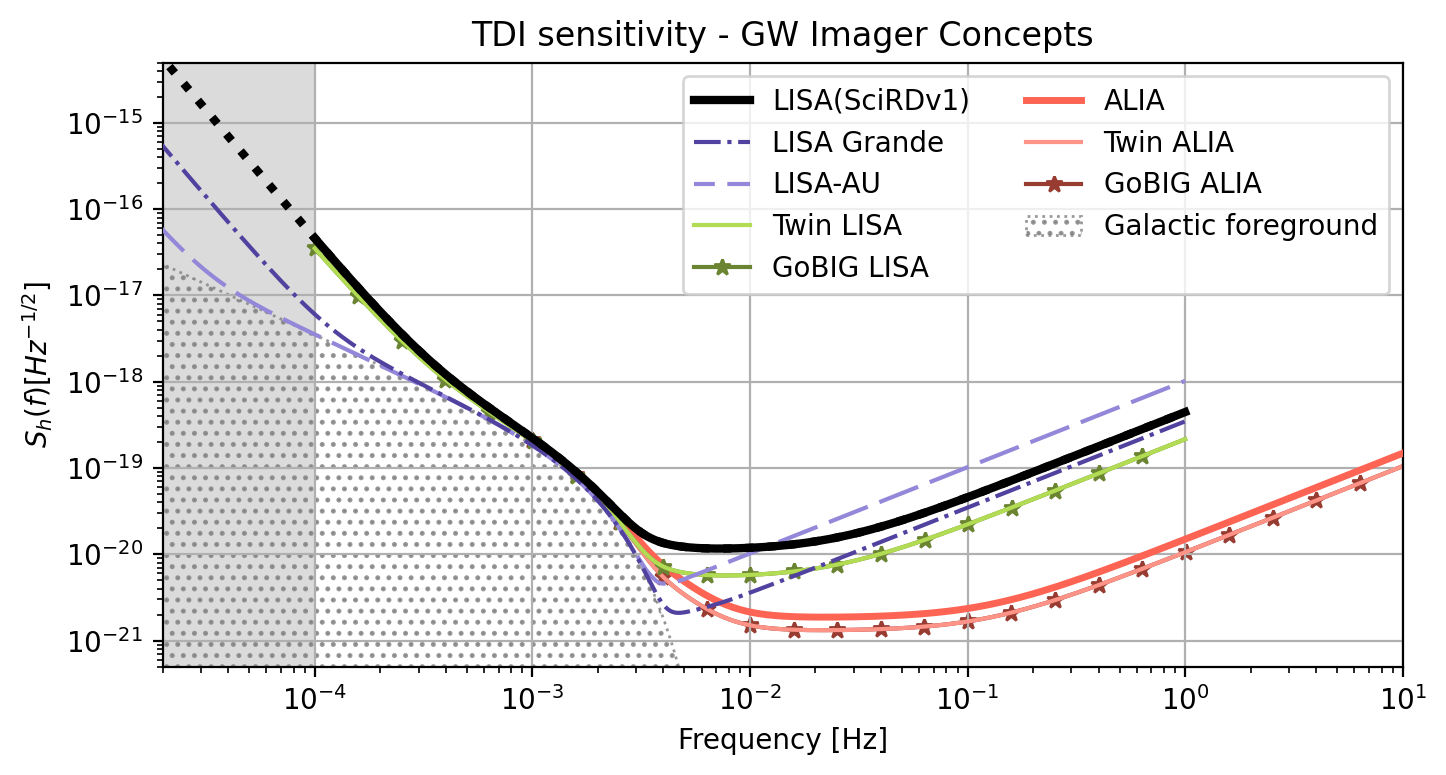

In [52]:
# f = np.logspace(-5,1,1000)

fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(1,1,1)

f_bg = np.logspace(-5,0, 1000 )
S_bg = bg.GBF_model_TN(f_bg, eval('concepts.%s' % missions[0]))

for m in missions:
    print(m)
    fr = np.array([0.00010, 0.00100, 0.01000, 0.10000, 1.00000])
    f  = np.logspace(faxis[m][0],faxis[m][1], 1000 )
    model = eval('concepts.%s' % m)
    model = bg.add2model(model)

    Sh = metrics.makeSensitivity(f, model, style = 'TN')
    Shr = metrics.makeSensitivity(fr, model, style = 'TN')
    if m == 'LISASciRDv1':
        ax.plot(np.logspace(-5, 0, 1000 ),np.sqrt(metrics.makeSensitivity(np.logspace(-5, 0, 1000 ), model, style = 'TN')), color = 'k', ls=':', lw=3, zorder=len(m))
        ax.plot(f,np.sqrt(Sh),label=model.get('label')[:-9], color = colpal[m], ls=linepal[m], lw=widthpal[m], zorder=zorderpal[m])

    else:
        ax.plot(f,np.sqrt(Sh),label=model.get('label')[:-9],color = colpal[m], ls=linepal[m], lw=widthpal[m], marker = markpal[m], markevery=50, zorder=zorderpal[m])
        
#ax.plot(f_bg,np.sqrt(S_bg),label=model.get('label'))
ax.fill_between([1e-5, 1e-4], y1=1e-14, y2=1e-23, color= 'lightgrey', alpha = 0.8, edgecolor='none')

ax.fill_between(f_bg, np.sqrt(S_bg), y2=1e-23, color = 'none', edgecolor= 'grey', hatch= '...', alpha = 0.8, ls = ':', label = 'Galactic foreground')
plt.title(r'TDI sensitivity - GW Imager Concepts')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$S_h(f) [Hz^{-1/2}]$')
plt.ylim([5e-22,5e-15])
plt.xlim([2e-5,1e1])
plt.legend(ncol=2,loc='upper right')
ax.grid(True)
plt.savefig('../plots/GWImager_sensitivities_gal.png')
plt.savefig('../plots/GWImager_sensitivities_gal.pdf')
plt.show()

In [30]:

eval('concepts.%s' % missions[0])

{'label': 'LISA(SciRDv1)',
 'sqSacc_ASD': [[3e-15, 1.2e-18], [0, -1]],
 'sqSoms_ASD': [[1.5e-11, 6e-17], [0, -2]],
 'Lconst': 2500000000.0,
 'Dsep': 0,
 'Rorbit': 1.0,
 'Torbit': 1.0,
 'Nindep': 2,
 'SciDuration': 4}

In [31]:
for m in missions:
    model = eval('concepts.%s' % m)
    print(model['label'])
    model['label'] -= ' + galaxy'
    print(model['label'])

LISA(SciRDv1)


TypeError: unsupported operand type(s) for -=: 'str' and 'str'

In [ ]:
len(' + galaxy')
